In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

In [0]:
max_words=10000

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
maxlen = 200

In [0]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [7]:
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [8]:
y_train[3]

1

In [9]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/15
22500/22500 [==============================] - 2s 106us/sample - loss: 0.6929 - acc: 0.5041 - val_loss: 0.6921 - val_acc: 0.5316
Epoch 2/15
22500/22500 [==============================] - 1s 29us/sample - loss: 0.6742 - acc: 0.6376 - val_loss: 0.6374 - val_acc: 0.7196
Epoch 3/15
22500/22500 [==============================] - 1s 29us/sample - loss: 0.5386 - acc: 0.7854 - val_loss: 0.4558 - val_acc: 0.8220
Epoch 4/15
22500/22500 [==============================] - 1s 29us/sample - loss: 0.3877 - acc: 0.8556 - val_loss: 0.3691 - val_acc: 0.8524
Epoch 5/15
22500/22500 [==============================] - 1s 30us/sample - loss: 0.3194 - acc: 0.8791 - val_loss: 0.3313 - val_acc: 0.8640
Epoch 6/15
22500/22500 [==============================] - 1s 30us/sample - loss: 0.2792 - acc: 0.8960 - val_loss: 0.3113 - val_acc: 0.8732
Epoch 7/15
22500/22500 [==============================] - 1s 28us/sample - loss: 0.2506 - acc: 0.9056 - val_loss: 0.

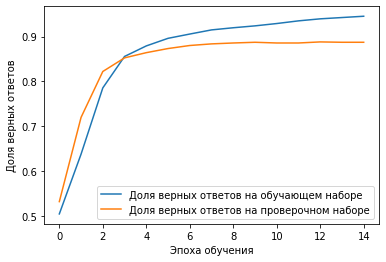

In [12]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)

25000/25000 [==============================] - 1s 47us/sample - loss: 0.3014 - acc: 0.8738


In [0]:
embedding_matrix = model.layers[0].get_weights()[0]

In [15]:
embedding_matrix[:5]

array([[-0.01798632, -0.02346252],
       [-0.03308427,  0.09167739],
       [-0.02628934,  0.0280689 ],
       [ 0.01402828,  0.04328248],
       [ 0.0196009 , -0.02919762]], dtype=float32)

In [16]:
word_index_org = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3

In [19]:
word = 'bad'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 78
Вектор для слова [-0.522194    0.38800254]


In [0]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

In [0]:
filename = 'imdb_embeddings.csv'

In [0]:
with open(filename, 'w') as f:
    for word_num in range(max_words):
      word = reverse_word_index[word_num]
      vec = embedding_matrix[word_num]
      f.write(word + ",")
      f.write(','.join([str(x) for x in vec]) + "\n")

In [23]:
!head -n 20 $filename

<Заполнитель>,-0.017986324,-0.023462525
<Начало последовательности>,-0.033084266,0.09167739
<Неизвестное слово>,-0.02628934,0.028068898
<Не используется>,0.014028285,0.043282475
the,0.019600902,-0.029197624
and,0.08880725,-0.031216178
a,-0.0013248568,-0.0010853095
of,-0.0064087026,0.017270101
to,0.007838123,0.031368647
is,0.062009867,-0.020657083
br,-0.023195438,0.03075724
in,0.032121304,0.00799555
it,0.052611277,-0.08243958
i,0.039014317,0.025931563
this,-0.017054193,0.031123707
that,0.014608821,0.010074337
was,-0.013997996,0.06437576
as,0.057925675,0.05546114
for,-0.015927525,0.015691059
with,0.007887527,-0.0019172115


In [0]:
files.download('imdb_embeddings.csv')

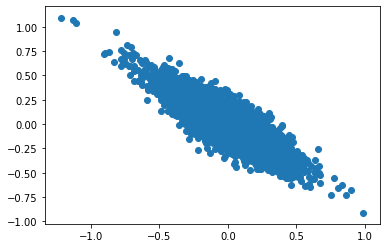

In [25]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

In [26]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
  enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

In [27]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[ 0.507926  , -0.44485885],
       [ 0.52339584, -0.5410736 ],
       [ 0.5650658 , -0.6316289 ],
       [ 0.15416948, -0.20506164],
       [-0.522194  ,  0.38800254],
       [-1.1049533 ,  1.0422788 ],
       [-0.5467411 ,  0.5416943 ],
       [-0.7402866 ,  0.61676925],
       [-0.22883593,  0.07905076]], dtype=float32)

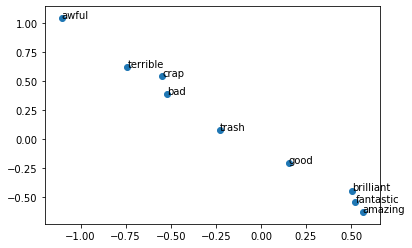

In [28]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
  plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))